In [25]:
import pandas as pd
import pathlib as path



import requests
import json
from pprint import pprint

import numpy as np
from scipy.stats import linregress

import matplotlib.pyplot as plt
import hvplot.pandas
import geopandas as gpd

# import files

In [32]:
### import and read csv file

path = 'Output/immigrants_by_country_year.csv'
imm_df = pd.read_csv(path)
imm_df = imm_df.rename(columns={'total':'Immigration_flow'})

imm_df.head(5)

,country,year,Immigration_flow
0,Afghanistan,2015,2625.0
1,Afghanistan,2016,2655.0
2,Afghanistan,2017,3460.0
3,Afghanistan,2018,3560.0
4,Afghanistan,2019,3890.0


In [33]:
### import and read csv file

path = 'Output/immigrants_by_country.csv'
imm_cumul_df = pd.read_csv(path)
imm_cumul_df = imm_cumul_df.rename(columns={'total':'Immigration_flow'})

imm_cumul_df.head(5)

,country,Immigration_flow
0,Afghanistan,81305.0
1,Albania,5540.0
2,Algeria,39655.0
3,Andorra,0.0
4,Angola,925.0


In [34]:
### import and read csv file

path = 'Output/countries_list_UN_referential.csv'
countries_df = pd.read_csv(path)


countries_df.head(5)

,Unnamed: 0,iso3Code,iso2Code,country,region,capitalCity,longitude,latitude
0,0,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.51670
1,2,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.52280
2,5,AGO,AO,Angola,Sub-Saharan Africa,Luanda,13.2420,-8.81155
3,6,ALB,AL,Albania,Europe & Central Asia,Tirane,19.8172,41.33170
4,7,AND,AD,Andorra,Europe & Central Asia,Andorra la Vella,1.5218,42.50750


In [35]:
### import and read csv file

path = 'Output/macro_economic_data.csv'
macro_data_df = pd.read_csv(path)

# #drop Nan values
# macro_data_df = macro_data_df['value'].dropna(how="all")

macro_data_df.head(5)

,Unnamed: 0,iso3Code,iso2Code,country,year,indicator,value
0,0,AFG,AF,Afghanistan,2023,GDP per capita (constant 2015 US$),379.707497
1,1,AFG,AF,Afghanistan,2022,GDP per capita (constant 2015 US$),377.665627
2,2,AFG,AF,Afghanistan,2021,GDP per capita (constant 2015 US$),408.625855
3,3,AFG,AF,Afghanistan,2020,GDP per capita (constant 2015 US$),527.834554
4,4,AFG,AF,Afghanistan,2019,GDP per capita (constant 2015 US$),557.861533


# immigration flow per year

In [30]:
immigration_year = imm_df.groupby(['year'])['Immigration_flow'].sum()
immigration_year

year
2015    271155.0
2016    295675.0
2017    285795.0
2018    320300.0
2019    340460.0
2020    183600.0
2021    405185.0
2022    436820.0
2023    471040.0
2024    413910.0
Name: Immigration_flow, dtype: float64

<Axes: title={'center': 'Flow immigration per year'}, xlabel='year', ylabel='Flow immigration'>

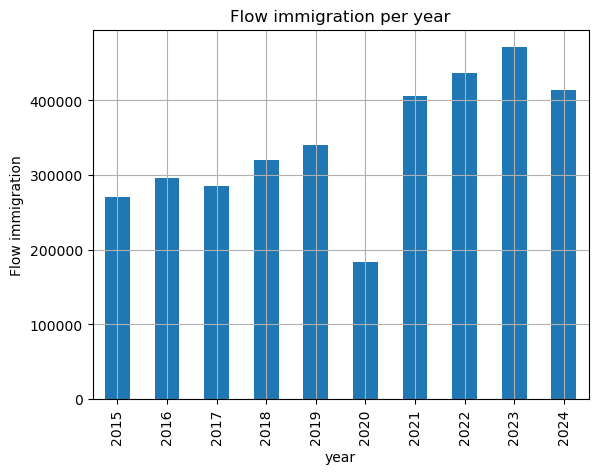

In [31]:
ax = immigration_year.plot(kind='bar')
ax.set_title('Flow immigration per year')
ax.set_ylabel('Flow immigration')
ax.grid()
ax

# immigration by country

In [62]:
countries_selection = imm_cumul_df.sort_values('Immigration_flow', ascending=False).head(20)
countries_selection['Immigration_flow (000`)'] = countries_selection['Immigration_flow'] / 1000
countries_selection = countries_selection.reset_index()
countries_selection = countries_selection.drop(columns = {'index', 'Immigration_flow'})
countries_selection = countries_selection.set_index('country').sort_values('Immigration_flow (000`)')
countries_selection

,Immigration_flow (000`)
country,
Jamaica,36.375
Morocco,38.215
Algeria,39.655
Mexico,40.410
Vietnam,41.200
Korea,49.120
Brazil,50.365
United Kingdom and Overseas Territories,50.770
Cameroon,50.885


<Axes: title={'center': 'Immigration by country from 2015-2024'}, ylabel='country'>

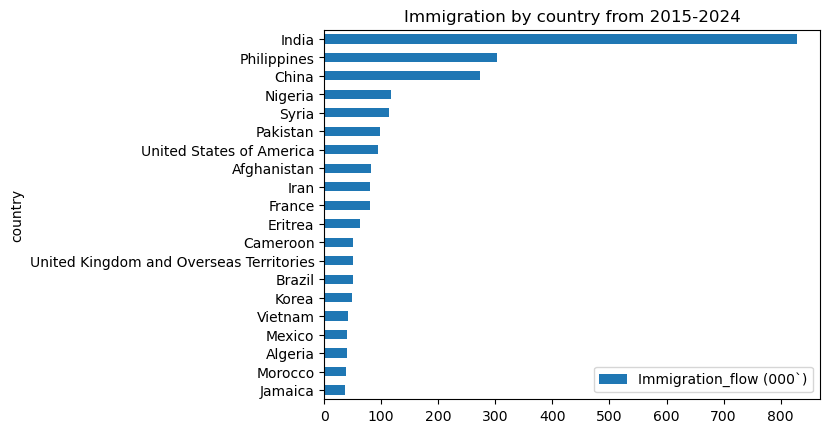

In [63]:
ax = countries_selection.plot(kind = "barh")
ax.set_title("Immigration by country from 2015-2024")
ax

# macro_data average

In [65]:
print(f'size before{macro_data_df.shape}')
macro_data_df_clean = macro_data_df.replace('', np.nan)
macro_data_df_clean = macro_data_df.dropna(how="any")
print(f'size after{macro_data_df_clean.shape}')

size before(16533, 7)
size after(11409, 7)


In [66]:
macro_data_df_clean

,Unnamed: 0,iso3Code,iso2Code,country,year,indicator,value
0,0,AFG,AF,Afghanistan,2023,GDP per capita (constant 2015 US$),379.707497
1,1,AFG,AF,Afghanistan,2022,GDP per capita (constant 2015 US$),377.665627
2,2,AFG,AF,Afghanistan,2021,GDP per capita (constant 2015 US$),408.625855
3,3,AFG,AF,Afghanistan,2020,GDP per capita (constant 2015 US$),527.834554
4,4,AFG,AF,Afghanistan,2019,GDP per capita (constant 2015 US$),557.861533
...,...,...,...,...,...,...,...
16528,16528,VUT,VU,Vanuatu,2019,Voice and Accountability: Number of Sources,4.000000
16529,16529,VUT,VU,Vanuatu,2018,Voice and Accountability: Number of Sources,3.000000
16530,16530,VUT,VU,Vanuatu,2017,Voice and Accountability: Number of Sources,3.000000
16531,16531,VUT,VU,Vanuatu,2016,Voice and Accountability: Number of Sources,3.000000


In [67]:
macro_data_avg_df = macro_data_df_clean.groupby(['country', 'indicator'])['value'].mean() 
macro_data_avg_df

country      indicator                                                                                     
Afghanistan  GDP per capita (constant 2015 US$)                                                                4.996702e+02
             Level of water stress: freshwater withdrawal as a proportion of available freshwater resources    5.475702e+01
             Population density (people per sq. km of land area)                                               5.720158e+01
             Population, total                                                                                 3.776927e+07
             Rural population (% of total population)                                                          7.419878e+01
                                                                                                                   ...     
Zimbabwe     Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)                               3.700000e+01
             Rural popul

In [68]:
macro_data_avg_df= macro_data_avg_df.reset_index()
macro_data_avg_df

,country,indicator,value
0,Afghanistan,GDP per capita (constant 2015 US$),4.996702e+02
1,Afghanistan,Level of water stress: freshwater withdrawal a...,5.475702e+01
2,Afghanistan,Population density (people per sq. km of land ...,5.720158e+01
3,Afghanistan,"Population, total",3.776927e+07
4,Afghanistan,Rural population (% of total population),7.419878e+01
...,...,...,...
1512,Zimbabwe,Poverty headcount ratio at $2.15 a day (2017 P...,3.700000e+01
1513,Zimbabwe,Rural population (% of total population),6.768956e+01
1514,Zimbabwe,Unemployment with advanced education (% of tot...,6.156250e+00
1515,Zimbabwe,"Unemployment, total (% of total labor force) (...",9.087000e+00


In [70]:
macro_data_avg_pivot = macro_data_avg_df.pivot(index='country', columns='indicator', values='value')
macro_data_avg_pivot

indicator,GDP per capita (constant 2015 US$),Level of water stress: freshwater withdrawal as a proportion of available freshwater resources,Market capitalization of listed domestic companies (% of GDP),Population density (people per sq. km of land area),"Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Rural population (% of total population),S&P Global Equity Indices (annual % change),Unemployment with advanced education (% of total labor force with advanced education),"Unemployment, total (% of total labor force) (national estimate)",Voice and Accountability: Number of Sources
country,,,,,,,,,,,
Afghanistan,499.670207,54.757019,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333,9.555556
Albania,4568.486552,5.815591,NaN,103.914380,2.836000e+06,0.100,38.859000,NaN,15.266800,13.999400,11.000000
Algeria,4623.518157,135.066031,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000,10.777778
Andorra,38684.748525,NaN,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN,2.000000
Angola,2680.045162,1.871883,NaN,25.554171,3.240189e+07,31.100,33.869000,NaN,17.857500,16.148000,12.222222
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,17530.700333,9.786096,NaN,19.364968,3.389126e+06,0.125,4.581556,NaN,2.457000,8.607444,11.666667
Uzbekistan,3231.037001,151.543693,7.293615,74.317431,3.306807e+07,2.300,49.477556,NaN,1.509000,6.627167,8.666667
Vanuatu,2780.356739,NaN,NaN,23.704994,2.924578e+05,10.000,74.573778,NaN,2.113000,4.745500,3.555556


In [76]:
macro_data_avg_pivot = macro_data_avg_pivot.rename(columns={
                                                'GDP per capita (constant 2015 US$)' : 'GDP_percapita' , 
                                                'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)' : 'Poverty headcount' ,                                                 
                                                'Unemployment with advanced education (% of total labor force with advanced education)' : 'Unemployment_educated' , 
                                                'Unemployment, total (% of total labor force) (national estimate)' : 'Unemployment_total' , 
                                                 'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources' : 'Level of water stress' , 
                                                 'Market capitalization of listed domestic companies (% of GDP)' : 'Market capitalization' , 
                                                 'Population density (people per sq. km of land area)' : 'Population density' , 
                                                 'Rural population (% of total population)' : 'Rural population' ,      
                                                 'S&P Global Equity Indices (annual % change)' : 'S&P Global Equity Indices' ,    
                                                 'Voice and Accountability: Number of Sources' : 'Voice and Accountability' ,                                   
                                                            })
macro_data_avg_pivot

indicator,GDP_percapita,Level of water stress,Market capitalization,Population density,"Population, total",Poverty headcount,Rural population,S&P Global Equity Indices,Unemployment_educated,Unemployment_total,Voice and Accountability
country,,,,,,,,,,,
Afghanistan,499.670207,54.757019,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333,9.555556
Albania,4568.486552,5.815591,NaN,103.914380,2.836000e+06,0.100,38.859000,NaN,15.266800,13.999400,11.000000
Algeria,4623.518157,135.066031,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000,10.777778
Andorra,38684.748525,NaN,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN,2.000000
Angola,2680.045162,1.871883,NaN,25.554171,3.240189e+07,31.100,33.869000,NaN,17.857500,16.148000,12.222222
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,17530.700333,9.786096,NaN,19.364968,3.389126e+06,0.125,4.581556,NaN,2.457000,8.607444,11.666667
Uzbekistan,3231.037001,151.543693,7.293615,74.317431,3.306807e+07,2.300,49.477556,NaN,1.509000,6.627167,8.666667
Vanuatu,2780.356739,NaN,NaN,23.704994,2.924578e+05,10.000,74.573778,NaN,2.113000,4.745500,3.555556


In [78]:
imm_vs_macrodata_df = pd.merge(macro_data_avg_pivot,imm_cumul_df, on='country')

imm_vs_macrodata_df

,country,GDP_percapita,Level of water stress,Market capitalization,Population density,"Population, total",Poverty headcount,Rural population,S&P Global Equity Indices,Unemployment_educated,Unemployment_total,Voice and Accountability,Immigration_flow
0,Afghanistan,499.670207,54.757019,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333,9.555556,81305.0
1,Albania,4568.486552,5.815591,NaN,103.914380,2.836000e+06,0.100,38.859000,NaN,15.266800,13.999400,11.000000,5540.0
2,Algeria,4623.518157,135.066031,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000,10.777778,39655.0
3,Andorra,38684.748525,NaN,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN,2.000000,0.0
4,Angola,2680.045162,1.871883,NaN,25.554171,3.240189e+07,31.100,33.869000,NaN,17.857500,16.148000,12.222222,925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uruguay,17530.700333,9.786096,NaN,19.364968,3.389126e+06,0.125,4.581556,NaN,2.457000,8.607444,11.666667,335.0
162,Uzbekistan,3231.037001,151.543693,7.293615,74.317431,3.306807e+07,2.300,49.477556,NaN,1.509000,6.627167,8.666667,1535.0
163,Vanuatu,2780.356739,NaN,NaN,23.704994,2.924578e+05,10.000,74.573778,NaN,2.113000,4.745500,3.555556,0.0
164,Zambia,1295.356040,2.835498,15.693374,24.559481,1.853135e+07,62.550,55.907667,4.750816,7.059286,6.317000,13.222222,605.0


In [79]:
imm_vs_macrodata_df = imm_vs_macrodata_df.rename(columns={
                                                'GDP per capita (constant 2015 US$)' : 'GDP_percapita' , 
                                                'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)' : 'Poverty headcount' ,                                                 
                                                'Unemployment with advanced education (% of total labor force with advanced education)' : 'Unemployment_educated' , 
                                                'Unemployment, total (% of total labor force) (national estimate)' : 'Unemployment_total' , 
                                                                                        
                                                            })
imm_vs_macrodata_df

,country,GDP_percapita,Level of water stress,Market capitalization,Population density,"Population, total",Poverty headcount,Rural population,S&P Global Equity Indices,Unemployment_educated,Unemployment_total,Voice and Accountability,Immigration_flow
0,Afghanistan,499.670207,54.757019,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333,9.555556,81305.0
1,Albania,4568.486552,5.815591,NaN,103.914380,2.836000e+06,0.100,38.859000,NaN,15.266800,13.999400,11.000000,5540.0
2,Algeria,4623.518157,135.066031,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000,10.777778,39655.0
3,Andorra,38684.748525,NaN,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN,2.000000,0.0
4,Angola,2680.045162,1.871883,NaN,25.554171,3.240189e+07,31.100,33.869000,NaN,17.857500,16.148000,12.222222,925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uruguay,17530.700333,9.786096,NaN,19.364968,3.389126e+06,0.125,4.581556,NaN,2.457000,8.607444,11.666667,335.0
162,Uzbekistan,3231.037001,151.543693,7.293615,74.317431,3.306807e+07,2.300,49.477556,NaN,1.509000,6.627167,8.666667,1535.0
163,Vanuatu,2780.356739,NaN,NaN,23.704994,2.924578e+05,10.000,74.573778,NaN,2.113000,4.745500,3.555556,0.0
164,Zambia,1295.356040,2.835498,15.693374,24.559481,1.853135e+07,62.550,55.907667,4.750816,7.059286,6.317000,13.222222,605.0


In [80]:
imm_vs_macrodata_df['Immigration_100k'] = imm_vs_macrodata_df['Immigration_flow'] / imm_vs_macrodata_df['Population, total'] * 100000
imm_vs_macrodata_df

,country,GDP_percapita,Level of water stress,Market capitalization,Population density,"Population, total",Poverty headcount,Rural population,S&P Global Equity Indices,Unemployment_educated,Unemployment_total,Voice and Accountability,Immigration_flow,Immigration_100k
0,Afghanistan,499.670207,54.757019,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333,9.555556,81305.0,215.267575
1,Albania,4568.486552,5.815591,NaN,103.914380,2.836000e+06,0.100,38.859000,NaN,15.266800,13.999400,11.000000,5540.0,195.345527
2,Algeria,4623.518157,135.066031,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000,10.777778,39655.0,91.793054
3,Andorra,38684.748525,NaN,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN,2.000000,0.0,0.000000
4,Angola,2680.045162,1.871883,NaN,25.554171,3.240189e+07,31.100,33.869000,NaN,17.857500,16.148000,12.222222,925.0,2.854772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uruguay,17530.700333,9.786096,NaN,19.364968,3.389126e+06,0.125,4.581556,NaN,2.457000,8.607444,11.666667,335.0,9.884554
162,Uzbekistan,3231.037001,151.543693,7.293615,74.317431,3.306807e+07,2.300,49.477556,NaN,1.509000,6.627167,8.666667,1535.0,4.641940
163,Vanuatu,2780.356739,NaN,NaN,23.704994,2.924578e+05,10.000,74.573778,NaN,2.113000,4.745500,3.555556,0.0,0.000000
164,Zambia,1295.356040,2.835498,15.693374,24.559481,1.853135e+07,62.550,55.907667,4.750816,7.059286,6.317000,13.222222,605.0,3.264738


In [81]:
def regression_plot(dataframe, col1, col2):
    
    df_regression = dataframe[[col1,col2]]
    df_regression = df_regression.dropna(how= 'any')


    x_axis = df_regression[col1]
    y_axis = df_regression[col2]

    ## calculate slope and intercept of the regression equation

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    #print the r-value

    print(f' The r^value is : {round(rvalue,3)}')

    ### generate the equation to be used as annotation
    
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    ## generate the regression line plot 

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}')

    ## Conditional Annotation position

    if slope >= 0 :
        x_annot_pos = 0.05
        y_annot_pos = 0.9
    else : x_annot_pos, y_annot_pos = 0.05, 0.1

    plt.annotate(line_eq,(x_annot_pos,y_annot_pos), fontsize=12,color="red", xycoords='axes fraction')

    # plt.savefig(f'Output/Q4_regression_{col1}_vs_{col2}.png')
    plt.show()

In [83]:
imm_vs_macrodata_df.columns

Index(['country', 'GDP_percapita', 'Level of water stress',
       'Market capitalization', 'Population density', 'Population, total',
       'Poverty headcount', 'Rural population', 'S&P Global Equity Indices',
       'Unemployment_educated', 'Unemployment_total',
       'Voice and Accountability', 'Immigration_flow', 'Immigration_100k'],
      dtype='object')

 The r^value is : 0.015


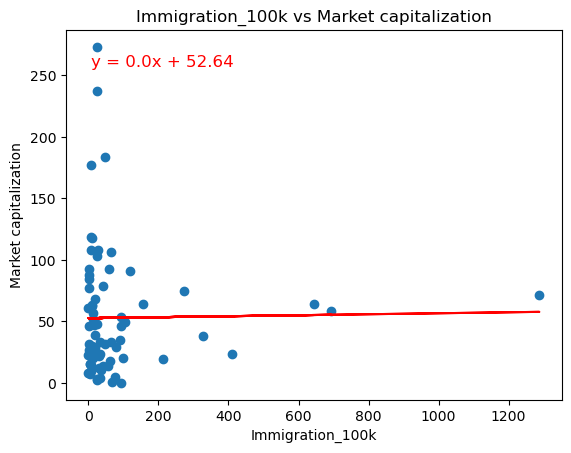

In [88]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'Market capitalization')

 The r^value is : -0.019


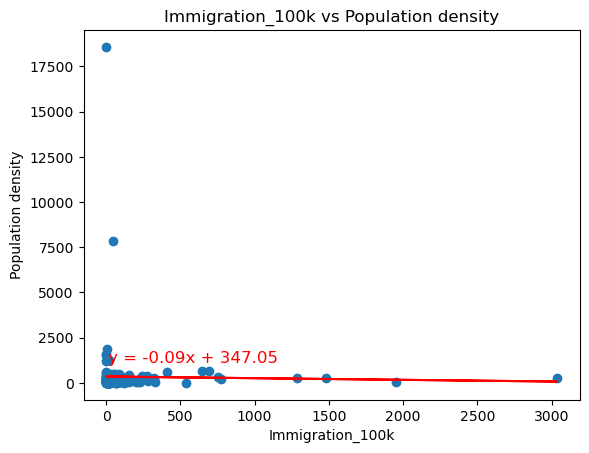

In [87]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'Population density')

 The r^value is : 0.311


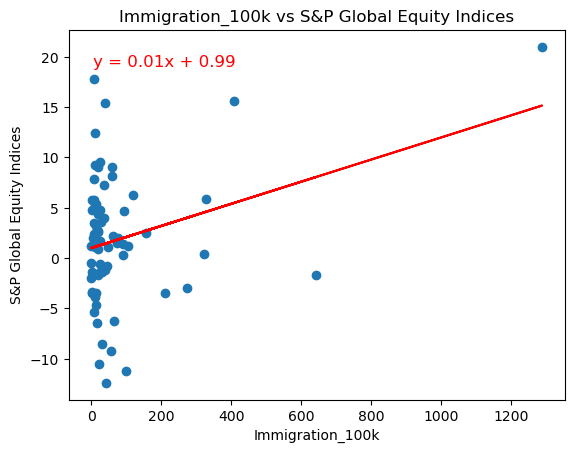

In [86]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'S&P Global Equity Indices')

 The r^value is : -0.241


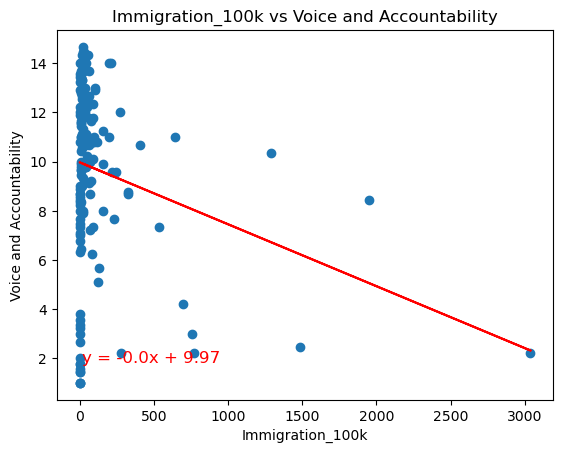

In [84]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'Voice and Accountability')

 The r^value is : -0.053


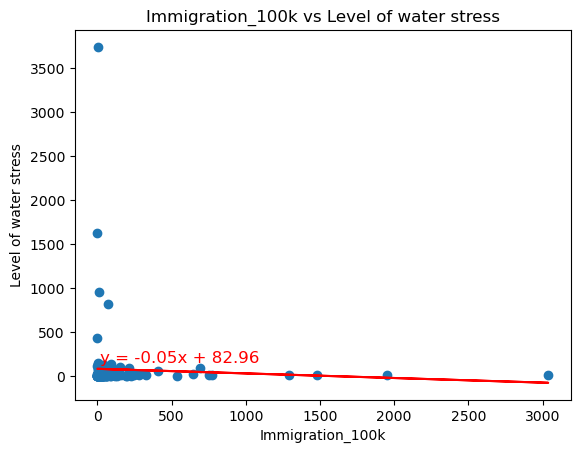

In [85]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'Level of water stress')

 The r^value is : -0.066


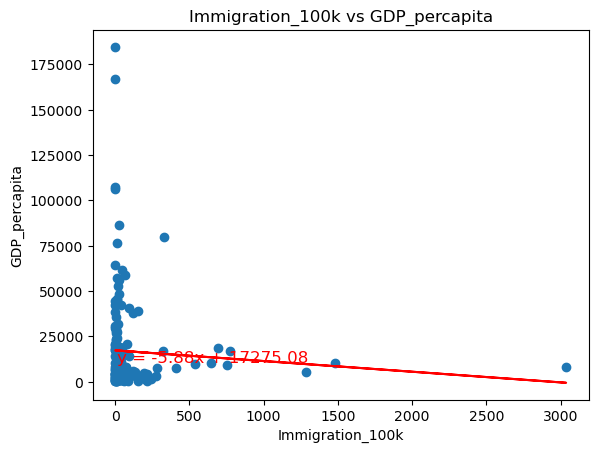

In [18]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'GDP_percapita')

 The r^value is : -0.133


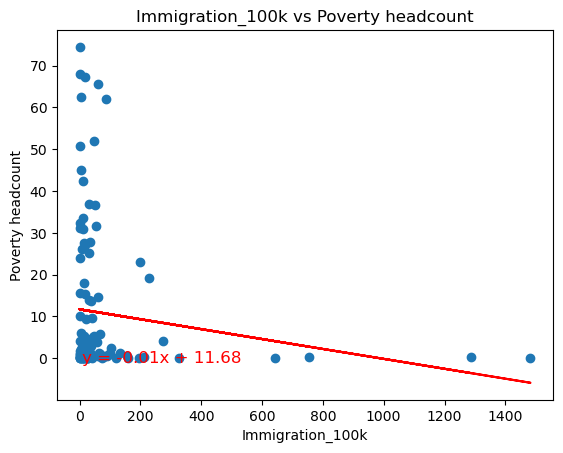

In [19]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'Poverty headcount')


 The r^value is : 0.235


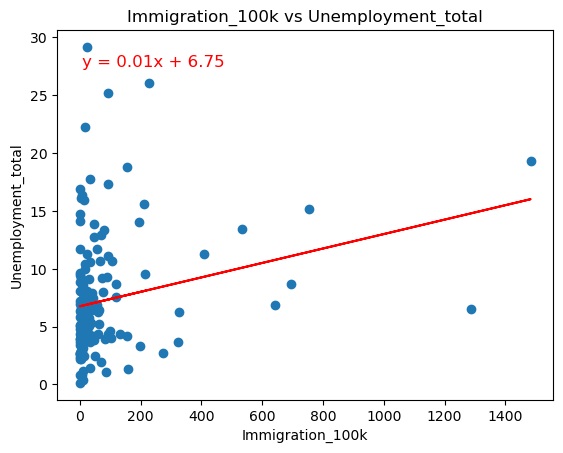

In [20]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'Unemployment_total')

 The r^value is : 0.11


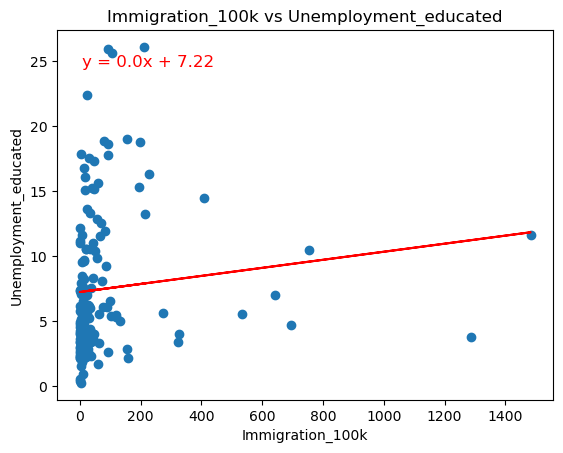

In [21]:
# correlation

regression_plot(imm_vs_macrodata_df,'Immigration_100k', 'Unemployment_educated')

In [24]:
## Create a world map with Vaccination %


## change US name to fit with world_df
# imm_df['country'] = imm_df['country'].replace({'United States': 'United States of America'})


data = pd.DataFrame({
    'country_name': imm_cumul_df['country'],  
    'vaccination': imm_cumul_df['Immigration_flow']  
})

# Load the world map
# world = gpd.read_file(gpd.datasets.get_path('Resources/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'))
world = gpd.read_file('Resources/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Merge the GeoDataFrame with your data
world = world.merge(data, how="left", left_on="name", right_on="country_name")

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Immigration_flow', ax=ax, legend=True,
           cmap='YlGn', missing_kwds={"color": "lightgrey"})

plt.title('Vaccination Percentage by Country', fontsize = 30)
# plt.savefig("Output/Q4_Vaccination%_worldwide.png")

plt.show()

ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing pyogrio resulted in: No module named 'pyogrio'
Importing fiona resulted in: No module named 'fiona'